## Trabajo práctico n°1

#### Visión por computadora

#### Enunciado
▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.


---

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.


---

### Parte 1

#### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [27]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np # type: ignore
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

#import os  # Para operaciones del sistema de archivos
from pathlib import Path  # Para manejo de rutas de archivos de manera más moderna


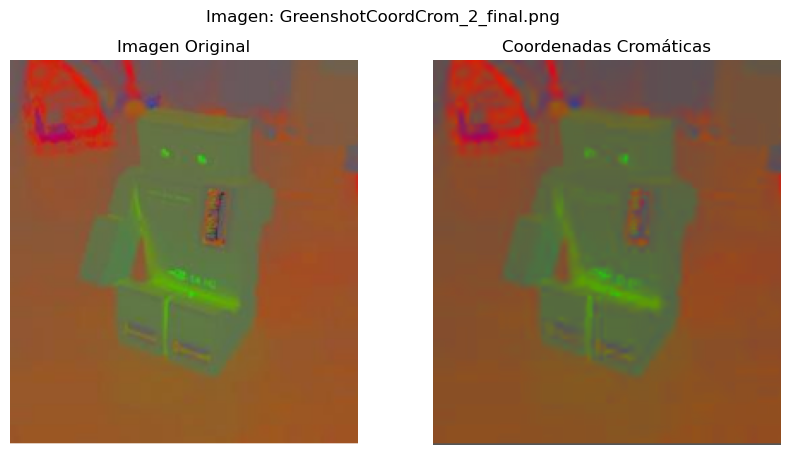

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


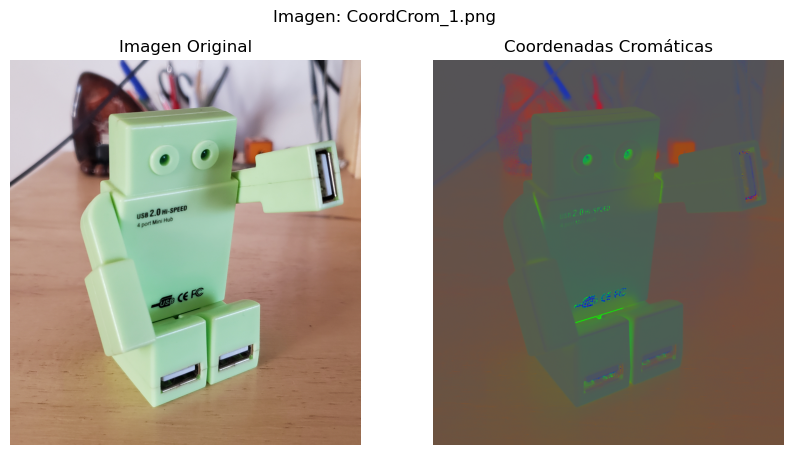

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


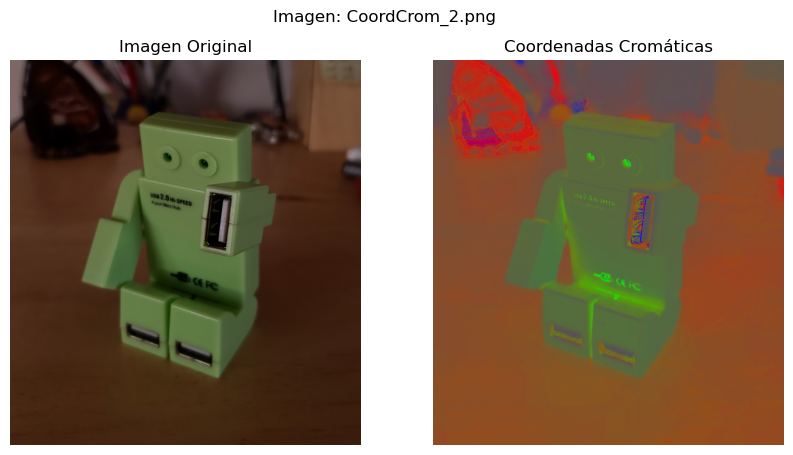

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


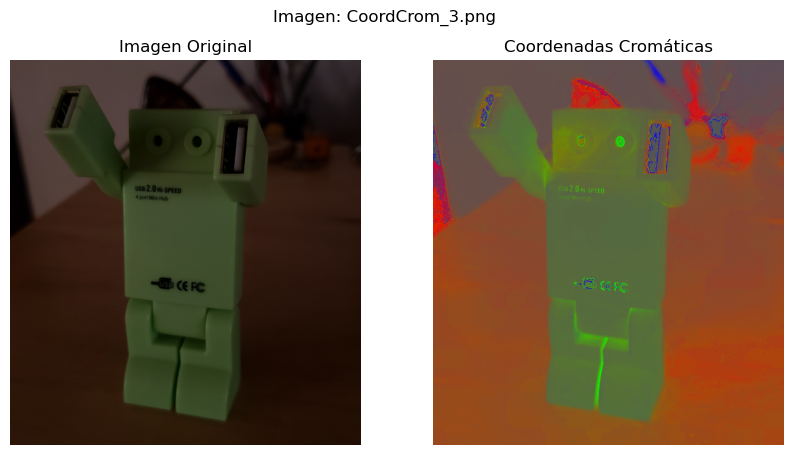

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


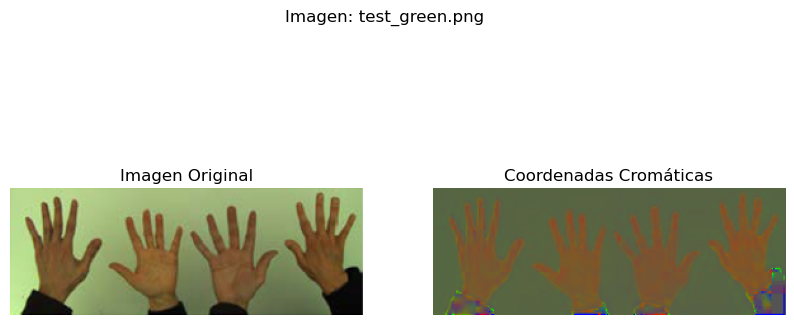

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


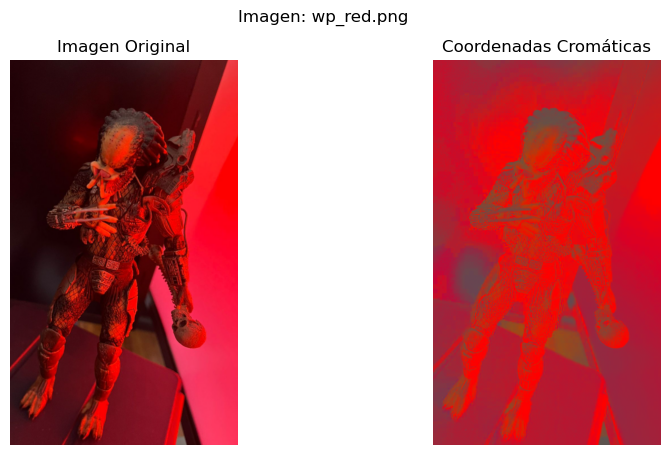

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


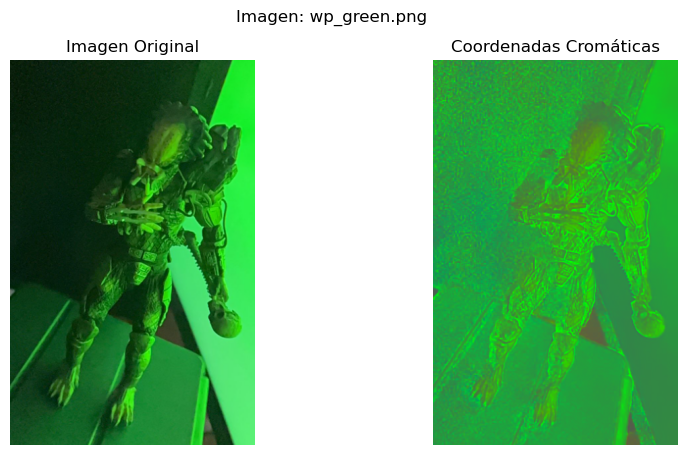

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


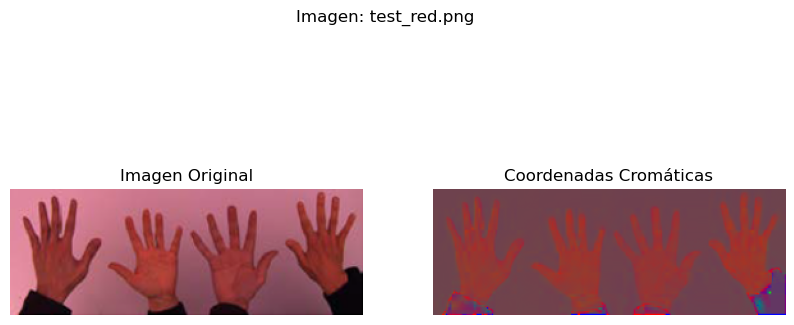

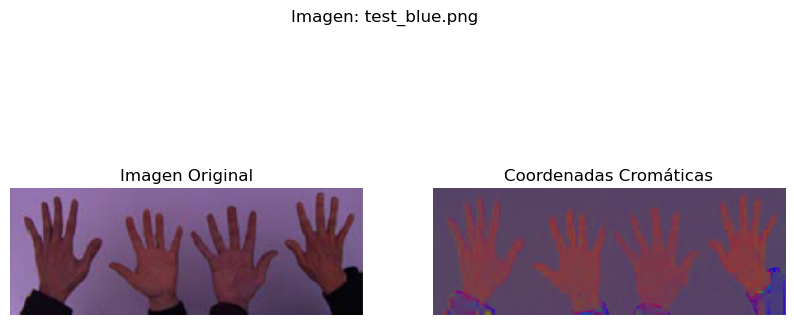

In [28]:

def process_chromatic_coordinates(img):
    """
    Función que procesa una imagen para obtener sus coordenadas cromáticas
    Parámetro: img - imagen en formato RGB
    Retorna: imagen procesada con coordenadas cromáticas
    """
    # Convertir la imagen a punto flotante para evitar truncamiento en los cálculos
    img_float = img.astype(np.float32)
    
    # Calcular la suma de los canales RGB para cada píxel
    # keepdims=True mantiene la dimensionalidad para la división
    # 1e-6 se suma para evitar división por cero
    sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6
    
    # Calcular la coordenada cromática r (rojo normalizado)
    r = img_float[:, :, 0:1] / sum_channels
    
    # Calcular la coordenada cromática g (verde normalizado)
    g = img_float[:, :, 1:2] / sum_channels
    
    # Calcular la coordenada cromática b (azul normalizado)
    b = 1 - r - g
    
    # Combinar los tres canales normalizados en una sola imagen
    return np.concatenate((r, g, b), axis=2)

def process_all_images(folder_path):
    """
    Función que procesa todas las imágenes PNG en una carpeta
    Parámetro: folder_path - ruta a la carpeta con las imágenes
    """
    # Crear una lista con todas las imágenes PNG en la carpeta especificada
    image_files = list(Path(folder_path).glob('*.png'))
    
    # Iterar sobre cada archivo de imagen encontrado
    for img_path in image_files:
        # Cargar la imagen usando OpenCV (por defecto en formato BGR)
        img = cv.imread(str(img_path))
        
        # Convertir la imagen de BGR a RGB (matplotlib usa RGB)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Procesar la imagen para obtener coordenadas cromáticas
        img_chromatic = process_chromatic_coordinates(img)
        
        # Crear una nueva figura para mostrar los resultados
        plt.figure(figsize=(10, 5))  # Tamaño de la figura: 10x5 pulgadas
        
        # Agregar un título general con el nombre del archivo
        plt.suptitle(f'Imagen: {img_path.name}')
        
        # Configurar y mostrar la imagen original (subplot izquierdo)
        plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
        plt.title('Imagen Original')
        plt.imshow(img)
        plt.axis('off')  # Ocultar los ejes
        
        # Configurar y mostrar la imagen procesada (subplot derecho)
        plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
        plt.title('Coordenadas Cromáticas')
        plt.imshow(img_chromatic)
        plt.axis('off')  # Ocultar los ejes
        
        # Mostrar la figura con ambas imágenes
        plt.show()

# Definir la ruta a la carpeta que contiene las imágenes
folder_path = './Material_TPs/TP1/coord_cromaticas'
folder_path2 = './Material_TPs/TP1/white_patch'
# Ejecutar el procesamiento de todas las imágenes en la carpeta
process_all_images(folder_path)
process_all_images(folder_path2)

- Se esta normalizando el color por cada píxel para eliminar efectos de intensidad y sombra.
- Se conserva información puramente cromática, útil para clasificación de colores, segmentación, etc.

#### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

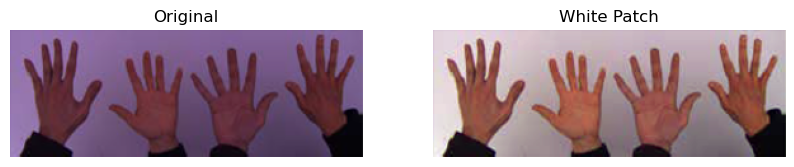

In [29]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_blue.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

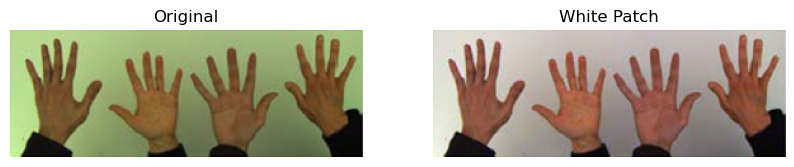

In [30]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_green.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

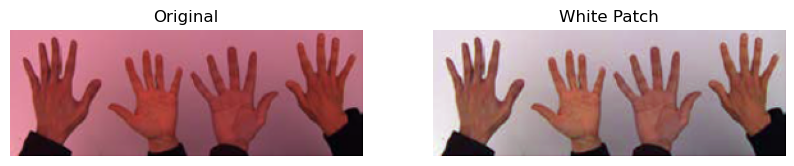

In [31]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_red.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

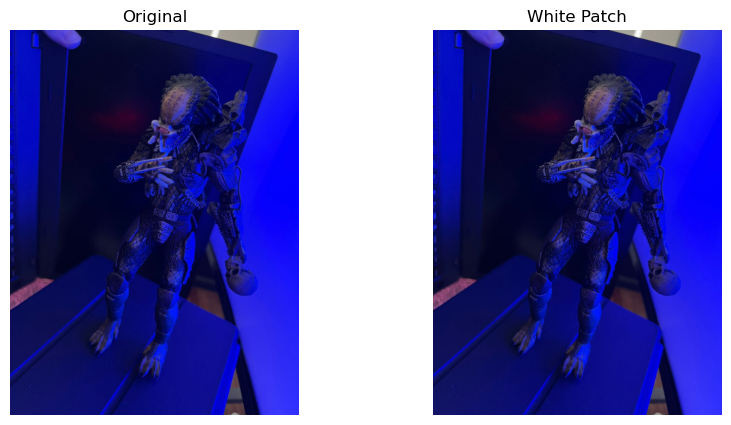

In [32]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/wp_blue.jpg')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()


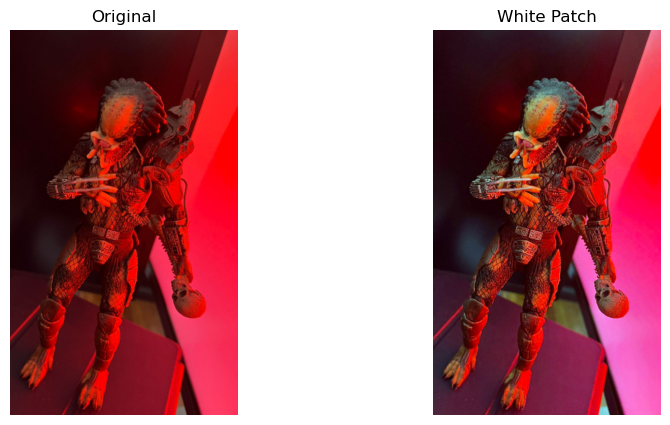

In [33]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/wp_red.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

#### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.